# Author : Vishal Sharma

# Data Science And Business Analytics Internship

# GRIP The Sparks Foundation

# GRIPNOV20

# Perform ‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore’

# Task:-
   
  . Perform ‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore’
  
  . As a business manager, try to find out the weak areas where you can work to make more profit. 
  
  . What all business problems you can derive by exploring the data?
 
# Dataset: https://bit.ly/3i4rbWl

# Importing all Libraries

In [1]:
#import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import datasets
from sklearn.cluster import KMeans

# Reading Dataset

In [2]:
store = pd.read_csv("C:\\SampleSuperstore.csv")

In [3]:
store.head(15)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
5,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,48.8600,7,0.00,14.1694
6,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Art,7.2800,4,0.00,1.9656
7,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Technology,Phones,907.1520,6,0.20,90.7152
8,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Binders,18.5040,3,0.20,5.7825
9,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Appliances,114.9000,5,0.00,34.4700


In [4]:
store.tail(15)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9979,Standard Class,Home Office,United States,Los Angeles,California,90032,West,Office Supplies,Binders,437.472,14,0.2,153.1152
9980,Second Class,Consumer,United States,Lafayette,Louisiana,70506,South,Furniture,Tables,85.980,1,0.0,22.3548
9981,First Class,Consumer,United States,Fairfield,Ohio,45014,East,Office Supplies,Labels,16.520,5,0.2,5.3690
9982,Standard Class,Consumer,United States,Grand Rapids,Michigan,49505,Central,Office Supplies,Paper,35.560,7,0.0,16.7132
9983,Standard Class,Consumer,United States,Grand Rapids,Michigan,49505,Central,Technology,Phones,97.980,2,0.0,27.4344
9984,Standard Class,Consumer,United States,Long Beach,New York,11561,East,Office Supplies,Labels,31.500,10,0.0,15.1200
9985,Standard Class,Consumer,United States,Long Beach,New York,11561,East,Office Supplies,Supplies,55.600,4,0.0,16.1240
9986,Standard Class,Consumer,United States,Los Angeles,California,90008,West,Technology,Accessories,36.240,1,0.0,15.2208
9987,Standard Class,Corporate,United States,Athens,Georgia,30605,South,Technology,Accessories,79.990,1,0.0,28.7964
9988,Standard Class,Corporate,United States,Athens,Georgia,30605,South,Technology,Phones,206.100,5,0.0,55.6470


In [5]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [6]:
store.shape

(9994, 13)

In [7]:
store.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [8]:
store.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [9]:
store.drop('Postal Code',axis='columns',inplace=True) #  dropping unnecessary columns
store.head(15)                                        #display dataset after removing unnecessary columns

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
5,Standard Class,Consumer,United States,Los Angeles,California,West,Furniture,Furnishings,48.8600,7,0.00,14.1694
6,Standard Class,Consumer,United States,Los Angeles,California,West,Office Supplies,Art,7.2800,4,0.00,1.9656
7,Standard Class,Consumer,United States,Los Angeles,California,West,Technology,Phones,907.1520,6,0.20,90.7152
8,Standard Class,Consumer,United States,Los Angeles,California,West,Office Supplies,Binders,18.5040,3,0.20,5.7825
9,Standard Class,Consumer,United States,Los Angeles,California,West,Office Supplies,Appliances,114.9000,5,0.00,34.4700


In [10]:
store.shape

(9994, 12)

In [11]:
store.corr()  # #correlation of numerical data

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200795,-0.028190,0.479064
Quantity,0.200795,1.000000,0.008623,0.066253
Discount,-0.028190,0.008623,1.000000,-0.219487
Profit,0.479064,0.066253,-0.219487,1.000000


In [12]:
store.groupby("State").Profit.agg(["sum","mean","min","max","count","median","std","var"]) #sum,mean,min,max,count median,
                                                                                           #standard deviation,Variance of
                                                                                           #each states of Profit


,sum,mean,min,max,count,median,std,var
State,,,,,,,,
Alabama,5786.8253,94.865989,0.0000,1459.2000,61,16.87500,210.901876,44479.601429
Arizona,-3427.9246,-15.303235,-814.4832,211.4955,224,2.53365,109.266267,11939.117124
Arkansas,4008.6871,66.811452,1.4190,843.1706,60,18.34080,123.249880,15190.532873
California,76381.3871,38.171608,-325.5720,1906.4850,2001,13.30560,97.691593,9543.647400
Colorado,-6527.8579,-35.867351,-3399.9800,247.9960,182,3.12480,276.424024,76410.240842
Connecticut,3511.4918,42.823071,-15.5826,294.6710,82,12.18310,66.138081,4374.245726
Delaware,9977.3748,103.930988,-48.7839,5039.9856,96,19.19700,518.953513,269312.749126
District of Columbia,1059.5893,105.958930,4.4344,648.5624,10,14.52720,213.461353,45565.749398
Florida,-3399.3017,-8.875461,-1811.0784,327.5922,383,2.93400,126.324165,15957.794770


# Data Visualization

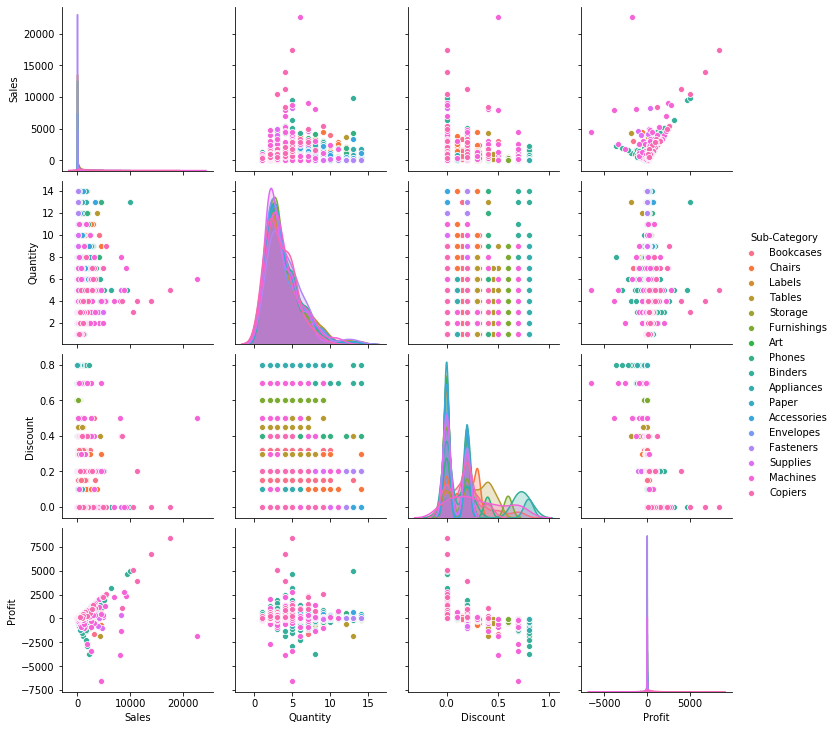

In [13]:
figsize=(15,10)
sns.pairplot(store,hue='Sub-Category')

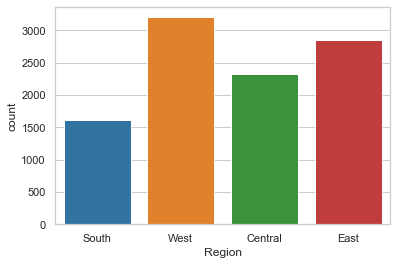

In [14]:
sns.set(style="whitegrid")
sns.countplot(x='Region',data=store,palette='tab10')

# West region has the highest count

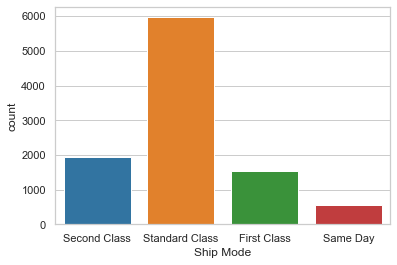

In [15]:
sns.set(style="whitegrid")
sns.countplot(x='Ship Mode',data=store,palette='tab10')

# Standard class has the highest count

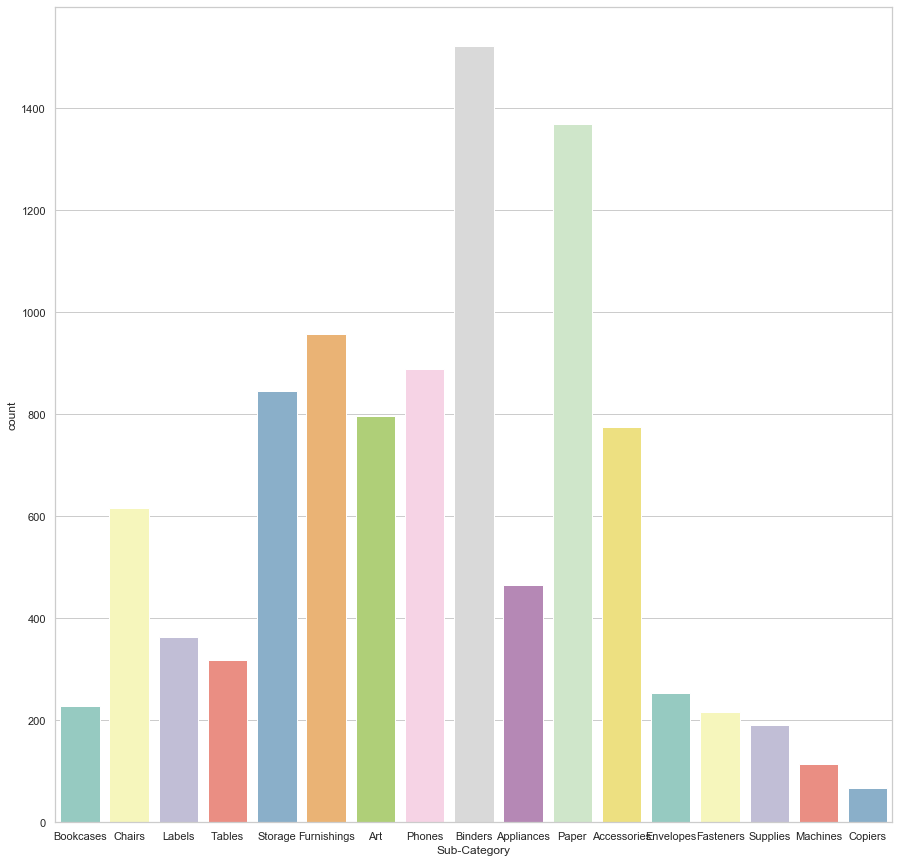

In [16]:
sns.set(style="whitegrid")
plt.figure(figsize=(15,15))
sns.countplot(x='Sub-Category',data=store,palette='Set3')

# Binders has the highest count

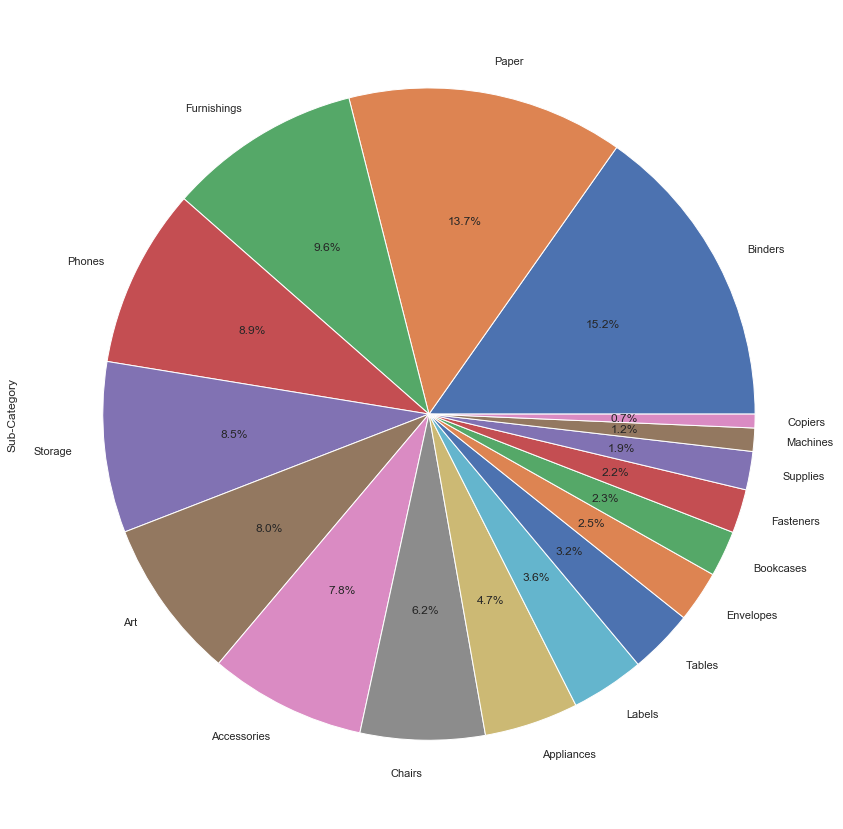

In [17]:
plt.figure(figsize=(15,15)) ##visual representation of count of each subcategory
store['Sub-Category'].value_counts().plot.pie(autopct='%1.1f%%')

#  The largest amount of categoies are papers,binders in the above pie chart

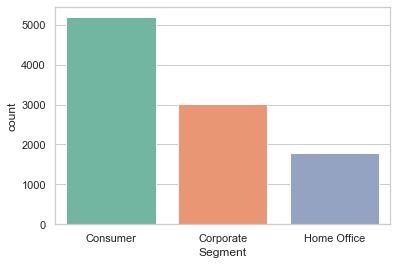

In [18]:
sns.set(style="whitegrid")
sns.countplot(x='Segment',data=store,palette='Set2')

# Customer has maximum count

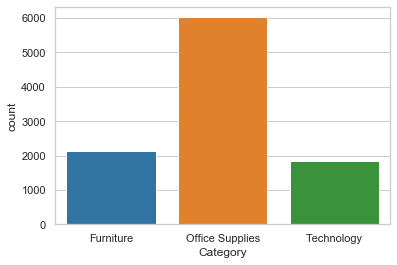

In [20]:
sns.set(style="whitegrid")
sns.countplot(x='Category',data=store,palette='tab10')

# Office Supplies has the maximum count

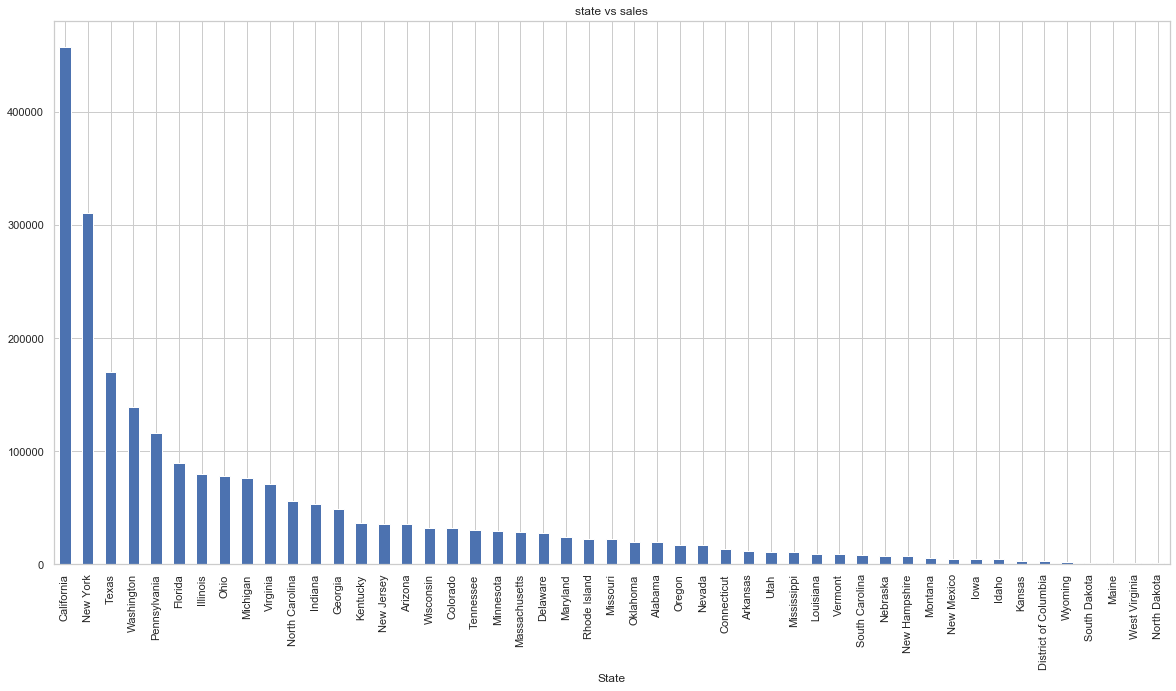

In [21]:
ste=store.groupby(['State'])['Sales'].sum()
ste.sort_values(ascending=False,inplace=True)
fig, ax=plt.subplots(figsize=(20,10))
plt.title('state vs sales')
ste.plot.bar()

# State wise graph plot
# State california has highest amount of sales

C:\Users\dell\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


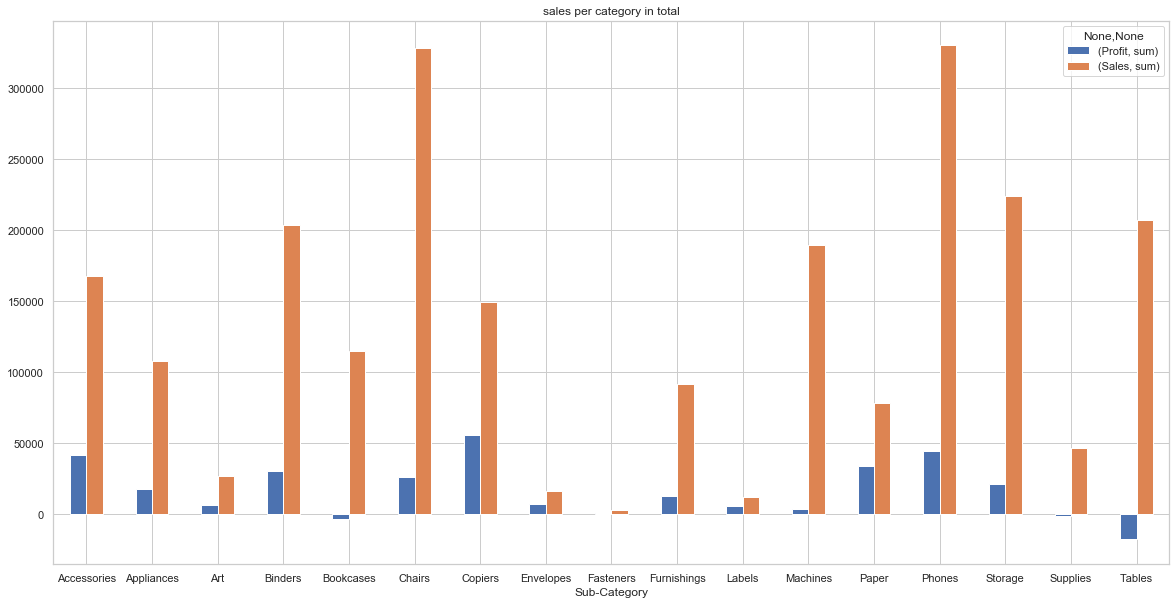

In [22]:
se=store.groupby(['Sub-Category'])['Profit','Sales'].agg(['sum'])
se.plot.bar(rot=0,title='sales per category in total',figsize=(20,10))
plt.show(block=True)

# Chairs and Phones has the highest amount of sales and copiers has the highest profit

# Conclusion:
# Technology has highest sales.
# People prefer ship mode compare to other modes.
# Corporate segment has highest count. 
# Customers from west region are more compared to other regions.¶